In [1]:
using Plots

In [2]:
gr()

Plots.GRBackend()

In [3]:
GR.inline()

"svg"

## Part I

### The function is :   (x[1]^2 + x[3]^3) + sqrt(x[2]^4 + x[1]^4)

### a. using Cubature approch

In [4]:
using Cubature

In [5]:
using Cuba

In [6]:
(val_1,err1) = hcubature(x -> begin ; (x[1]^2 + x[3]^3) + sqrt(x[2]^4 + x[1]^4); end, [0,0,0],[1,1,1])

(1.1280480399042043, 1.1135586221886959e-8)

In [7]:
println("The output from Cubature approach \n
    result: $val_1\n
    error: $(err1)")

The output from Cubature approach 

    result: 1.1280480399042043

    error: 1.1135586221886959e-8


### b. using Cuba approch

In [11]:
val_2, err2 = cuhre((x,f) -> f[1]=(x[1]^2 + x[3]^3) + sqrt(x[2]^4 + x[1]^4), 3, 1, atol=1e-12, rtol=1e-10)

Component:
 1: 1.1280480399377062 ± 1.0795599548642286e-10 (prob.: 0.0)
Integrand evaluations: 16891
Number of subregions:  67
Note: The desired accuracy was reached

In [12]:
println("The output from Cuba approach \n
    result: $(val_2[1])\n
    error: $(err2[1])")


The output from Cuba approach 

    result: 1.1280480399377062

    error: 1.0795599548642286e-10


## Part II

In [13]:
using DifferentialEquations

In [16]:
function rhs(du, u)    
    du[1] = u[2]
    du[2] = u[3]
    du[3] = u[4]
    du[4] = 4.0*u[3]*sqrt(5.0 - u[1]^2)
    
end

rhs (generic function with 2 methods)

In [17]:
u0 = [0.3,0,0,0.2]
tspan = (0.0,2.0)
prob = ODEProblem(rhs,u0,tspan)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 2.0)
u0: [0.3, 0.0, 0.0, 0.2]

In [18]:
@timev sol = solve(prob)

  9.282044 seconds (32.35 M allocations: 1.575 GiB, 10.27% gc time)
elapsed time (ns): 9282044002
gc time (ns):      953237642
bytes allocated:   1690893669
pool allocs:       32337848
non-pool GC allocs:8104
malloc() calls:    147
GC pauses:         74
full collections:  2


retcode: Success
Interpolation: Automatic order switching interpolation
t: 14-element Array{Float64,1}:
 0.0                 
 0.007041734555916783
 0.042398667062783946
 0.11191801962796667 
 0.20854485527915462 
 0.3303863358636944  
 0.4797139835029366  
 0.6553449434287846  
 0.856537049761148   
 1.0814940486777238  
 1.3282844830931773  
 1.5943384711876956  
 1.8752356947177549  
 2.0                 
u: 14-element Array{Array{Float64,1},1}:
 [0.3, 0.0, 0.0, 0.2]                                                                    
 [0.30000001163931006, 4.958784167645559e-6, 0.0014084500751366095, 0.20004395172686482] 
 [0.30000254261907255, 0.00018000351172479424, 0.008502269681888743, 0.20159544445275177]
 [0.3000469882252729, 0.0012641956402911702, 0.02280007949437682, 0.21120506875888959]   
 [0.3003082077458096, 0.004490610016329734, 0.044440731682109436, 0.23980180610124238]   
 [0.3012616196338644, 0.011824432883156481, 0.07725934151978325, 0.30480147256234474]    
 [0.304

In [19]:
sol.t

14-element Array{Float64,1}:
 0.0                 
 0.007041734555916783
 0.042398667062783946
 0.11191801962796667 
 0.20854485527915462 
 0.3303863358636944  
 0.4797139835029366  
 0.6553449434287846  
 0.856537049761148   
 1.0814940486777238  
 1.3282844830931773  
 1.5943384711876956  
 1.8752356947177549  
 2.0                 

In [20]:
sol.u

14-element Array{Array{Float64,1},1}:
 [0.3, 0.0, 0.0, 0.2]                                                                    
 [0.30000001163931006, 4.958784167645559e-6, 0.0014084500751366095, 0.20004395172686482] 
 [0.30000254261907255, 0.00018000351172479424, 0.008502269681888743, 0.20159544445275177]
 [0.3000469882252729, 0.0012641956402911702, 0.02280007949437682, 0.21120506875888959]   
 [0.3003082077458096, 0.004490610016329734, 0.044440731682109436, 0.23980180610124238]   
 [0.3012616196338644, 0.011824432883156481, 0.07725934151978325, 0.30480147256234474]    
 [0.3040738369337111, 0.027199823804214887, 0.13204901750782788, 0.44105807324538404]    
 [0.3113380824174935, 0.05842145347818366, 0.23154824400622614, 0.7176580450039667]      
 [0.3289116137866143, 0.12280395901853175, 0.4274625611557682, 1.2875861061089036]       
 [0.3702604502284103, 0.26010890100357587, 0.8384157855736566, 2.5005817862719906]       
 [0.46758001170030516, 0.5656286799286072, 1.7470295329249195,

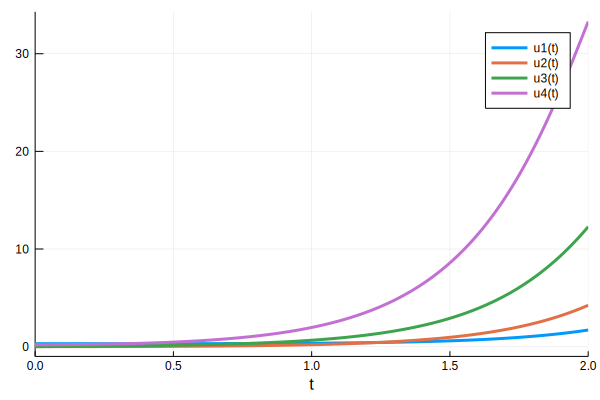

In [21]:
plot(sol)

## Part III

In [22]:
using Optim

### function f(x)

In [23]:
f(x) = x[1]^2 + x[2]^3 + 5x[1] - 4

f (generic function with 1 method)

### gradient functions g!

In [24]:
function g!(G,x)
    G[1] = 2x[1] + 5
    G[2] = 3x[2]^2
end

g! (generic function with 1 method)

### Hessian function h!

In [25]:
function h!(H,x)
    H[1,1] = 2
    H[1,2] = 0
    H[2,1] = 0
    H[2,2] = 6x[2]
end

h! (generic function with 1 method)

### Newton's method for optimization 

### a) stating guesses [0.0, 0.0]

In [26]:
xa = [0.0,0.0]

2-element Array{Float64,1}:
 0.0
 0.0

In [27]:
optimize(f, g!, h!, xa)

 * Status: success

 * Candidate solution
    Minimizer: [-2.50e+00, 0.00e+00]
    Minimum:   -1.025000e+01

 * Found with
    Algorithm:     Newton's Method
    Initial Point: [0.00e+00, 0.00e+00]

 * Convergence measures
    |x - x'|               = 2.50e+00 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.00e+00 ≰ 0.0e+00
    |f(x) - f(x')|         = 6.25e+00 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 6.10e-01 ≰ 0.0e+00
    |g(x)|                 = 0.00e+00 ≤ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    1
    f(x) calls:    4
    ∇f(x) calls:   4
    ∇²f(x) calls:  1


### b)  stating guesses [-1.0, 1.0]

In [28]:
xb = [-1.0, 1.0]

2-element Array{Float64,1}:
 -1.0
  1.0

In [29]:
optimize(f, g!, h!, xb)

 * Status: success

 * Candidate solution
    Minimizer: [-2.65e+00, 4.50e-01]
    Minimum:   -1.013638e+01

 * Found with
    Algorithm:     Newton's Method
    Initial Point: [-1.00e+00, 1.00e+00]

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 6.07e-01 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    2
    f(x) calls:    55
    ∇f(x) calls:   55
    ∇²f(x) calls:  2


### c) stating guesses [2.0, -1.0]

In [30]:
xc = [2.0, -1.0]

2-element Array{Float64,1}:
  2.0
 -1.0

In [31]:
optimize(f, g!, h!, xc)

 * Status: success

 * Candidate solution
    Minimizer: [-2.91e+00, -1.55e+00]
    Minimum:   -1.377375e+01

 * Found with
    Algorithm:     Newton's Method
    Initial Point: [2.00e+00, -1.00e+00]

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 7.17e+00 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    2
    f(x) calls:    55
    ∇f(x) calls:   55
    ∇²f(x) calls:  2


## Part IV

In [32]:
using JuMP
using Ipopt

## a. Use the JuMP approach

### build the model

In [33]:
model = Model(with_optimizer(Ipopt.Optimizer))

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Ipopt

In [34]:
@variable(model, 0 <= x )

x

In [35]:
@variable(model, 0 <= y )

y

In [36]:
@variable(model, 0 <= z )

z

In [37]:
@objective(model, Max, 3x + 2y + z)

3 x + 2 y + z

In [38]:
@constraint(model,  x-y+z ≤ 4)

x - y + z ≤ 4.0

In [39]:
@constraint(model, 2x+y+3z ≤ 6)

2 x + y + 3 z ≤ 6.0

In [40]:
@constraint(model, -x+2z <= 3)

-x + 2 z ≤ 3.0

In [41]:
@constraint(model, x+y+z ≤ 8)

x + y + z ≤ 8.0

In [42]:
optimize!(model)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:       11
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:        3
                     variables with only lower bounds:        3
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equ

### Check whether the optimal solution is found

In [43]:
termination_status(model)

LOCALLY_SOLVED::TerminationStatusCode = 4

In [44]:
primal_status(model)

FEASIBLE_POINT::ResultStatusCode = 1

In [45]:
dual_status(model)

FEASIBLE_POINT::ResultStatusCode = 1

### The maximal value is : 

In [46]:
println("The maximal value is $(objective_value(model))")

The maximal value is 12.000000172483075


In [47]:
println("
    the x is $(value(x))
    the y is $(value(y))
    the z is $(value(z))")


    the x is 0.0
    the y is 6.000000102233143
    the z is 0.0
